**Stats503 final project**

reference: https://www.kaggle.com/code/aleespinosa/google-capstone-project-in-r-bellabeat/notebook

slides1: https://docs.google.com/presentation/d/1ms8yEQwstdDe-i_1qBLJuB0f5IA_hNX8IuISJIIZaaw/edit

slides2: 

### set up code

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%load_ext rpy2.ipython

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%%R

# library(ggplot2)
# library(dplyr)
# install.packages('plotly')
# library(plotly)
# install.packages('reshape')
# library(reshape)

# install.packages("MASS")
# install.packages("klaR") # please install it if you have not
# install.packages("tidyverse")
# install.packages('ggmosaic')
# library(grid)
# library(klaR)
# library(MASS)       
# library(tidyverse)
# library(ggmosaic)
# install.packages('kernlab')
# library(kernlab)


NULL


In [ ]:
%%R 
path = './AW data/data_for_weka_aw.csv'
data = read.csv(path)

set.seed(503)
#randomly sample 70% of data in each species group as the training set
train <- data %>% group_by(activity_trimmed) %>% sample_frac(0.7) %>% ungroup() 
#getting the rest of data (whose row id's are not in the training set) as the test set
#check function anti_join for more details
test <- anti_join(data, train, by = 'X')
# remove the column id
# split train and test
train <- dplyr::select(train, -X)
test <- dplyr::select(test, -X)
# get x and y
train_x = train[, -c(17)]
train_y = train[,17]
test_x = test[, -c(1,17)]
test_y = test[,17]

In [ ]:
%%R 

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "data/" # change to your path
# url = "/content/drive/myDrive/test.txt"
FOLDER_PATH = paste("drive/MyDrive/" ,GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, sep="")
# load( paste(FOLDER_PATH, 'mnist.RData', sep=""))
PATH = paste(FOLDER_PATH, 'data_for_weka_aw.csv', sep="")
df = read.csv(PATH)
head(df)

  X age gender height weight Applewatch.Steps_LE Applewatch.Heart_LE
1 1  20      1    168   65.4            10.77143            78.53130
2 2  20      1    168   65.4            11.47532            78.45339
3 3  20      1    168   65.4            12.17922            78.54083
4 4  20      1    168   65.4            12.88312            78.62826
5 5  20      1    168   65.4            13.58701            78.71569
6 6  20      1    168   65.4            14.29091            78.80313
  Applewatch.Calories_LE Applewatch.Distance_LE EntropyApplewatchHeartPerDay_LE
1              0.3445329            0.008326857                        6.221612
2              3.2876255            0.008896346                        6.221612
3              9.4840000            0.009465835                        6.221612
4             10.1545556            0.010035325                        6.221612
5             10.8251111            0.010604814                        6.221612
6             11.4956667            0

# EDA

In [ ]:
%%R
df$activity_trimmed <- factor(df$activity_trimmed, levels=c('Lying','Sitting','Self Pace walk','Running 3 METs','Running 5 METs','Running 7 METs'))
df$gender <- as.factor(ifelse(df$gender==0,'female','male'))
names(df)[names(df) == 'activity_trimmed'] <- 'activity'
head(df)

  X age gender height weight Applewatch.Steps_LE Applewatch.Heart_LE
1 1  20   male    168   65.4            10.77143            78.53130
2 2  20   male    168   65.4            11.47532            78.45339
3 3  20   male    168   65.4            12.17922            78.54083
4 4  20   male    168   65.4            12.88312            78.62826
5 5  20   male    168   65.4            13.58701            78.71569
6 6  20   male    168   65.4            14.29091            78.80313
  Applewatch.Calories_LE Applewatch.Distance_LE EntropyApplewatchHeartPerDay_LE
1              0.3445329            0.008326857                        6.221612
2              3.2876255            0.008896346                        6.221612
3              9.4840000            0.009465835                        6.221612
4             10.1545556            0.010035325                        6.221612
5             10.8251111            0.010604814                        6.221612
6             11.4956667            0

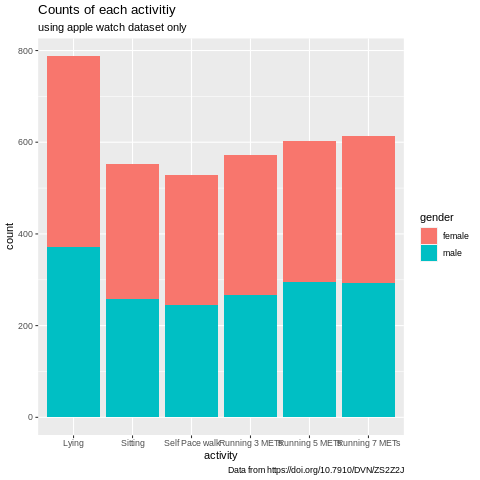

In [ ]:
%%R
ggplot(df, aes(activity, fill=gender)) +
  geom_histogram(stat="count") +
    labs(title='Counts of each activitiy', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

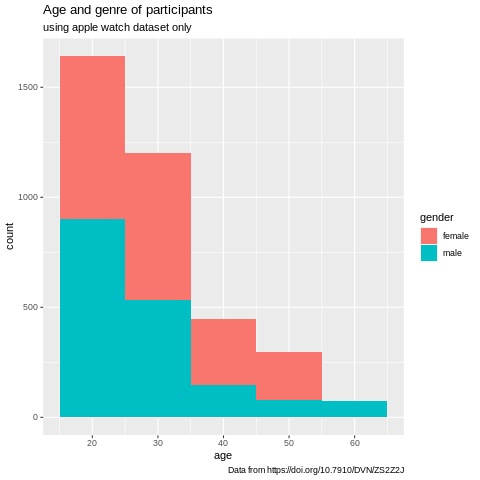

In [ ]:
%%R
ggplot(df, aes(x=age, fill=gender)) + 
    geom_histogram(binwidth=10) + #facet_grid(~gender) +
    labs(title='Age and genre of participants', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

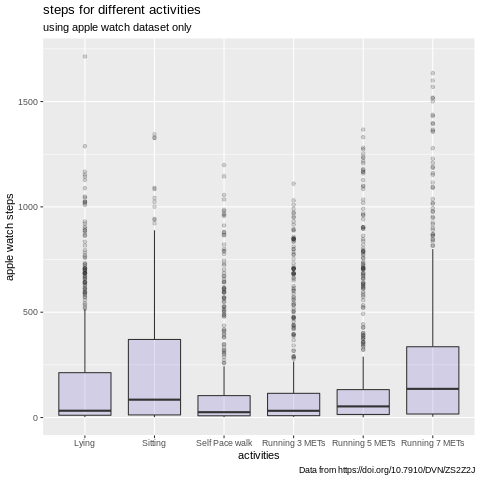

In [ ]:
%%R
# boxplot(df$Applewatch.Calories_LE ~ df$activity,
#         col='steelblue',
#         main='Origin by Hourse Power',
#         xlab='Origin',
#         ylab='horsepower') 

ggplot(df, aes(x=activity, y=Applewatch.Steps_LE)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("activities") +
    ylab("apple watch steps") +
      labs(title='steps for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

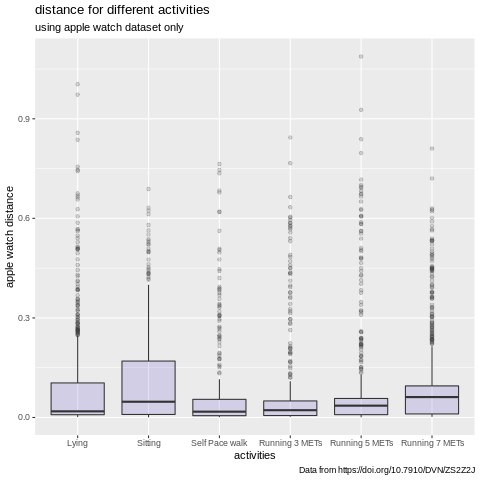

In [ ]:
%%R
# boxplot(df$Applewatch.Calories_LE ~ df$activity,
#         col='steelblue',
#         main='Origin by Hourse Power',
#         xlab='Origin',
#         ylab='horsepower') 

ggplot(df, aes(x=activity, y=Applewatch.Distance_LE)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("activities") +
    ylab("apple watch distance") +
      labs(title='distance for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

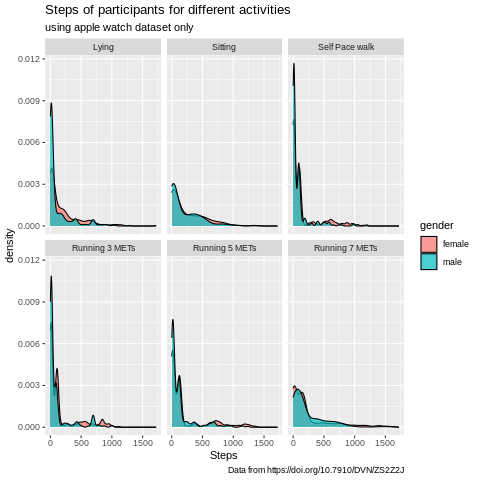

In [ ]:
%%R
ggplot(df, aes(x=Applewatch.Steps_LE, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Steps of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Steps'
        )

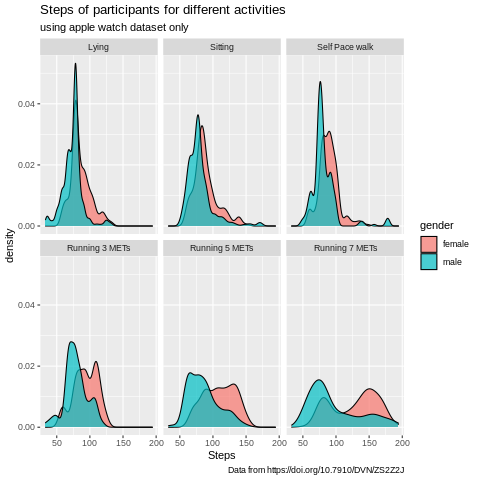

In [ ]:
%%R
ggplot(df, aes(x=Applewatch.Heart_LE, fill=gender)) + 
    geom_density(alpha=0.7) +
    facet_wrap(~activity) +
    labs(title='Heartrate of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Heart_LE'
        )

In [ ]:
%%R
head(df)

  X age gender height weight Applewatch.Steps_LE Applewatch.Heart_LE
1 1  20   male    168   65.4            10.77143            78.53130
2 2  20   male    168   65.4            11.47532            78.45339
3 3  20   male    168   65.4            12.17922            78.54083
4 4  20   male    168   65.4            12.88312            78.62826
5 5  20   male    168   65.4            13.58701            78.71569
6 6  20   male    168   65.4            14.29091            78.80313
  Applewatch.Calories_LE Applewatch.Distance_LE EntropyApplewatchHeartPerDay_LE
1              0.3445329            0.008326857                        6.221612
2              3.2876255            0.008896346                        6.221612
3              9.4840000            0.009465835                        6.221612
4             10.1545556            0.010035325                        6.221612
5             10.8251111            0.010604814                        6.221612
6             11.4956667            0

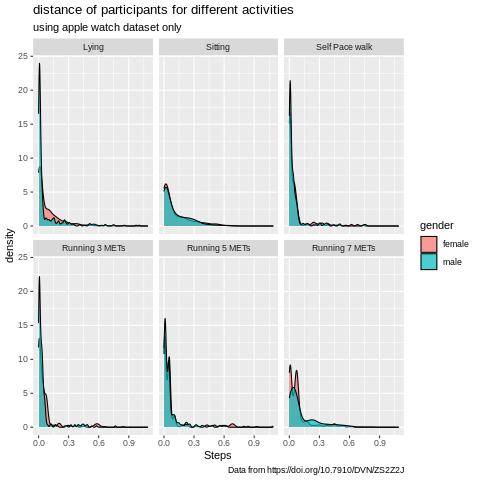

In [ ]:
%%R
ggplot(df, aes(x=Applewatch.Distance_LE, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='distance of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Steps'
        )

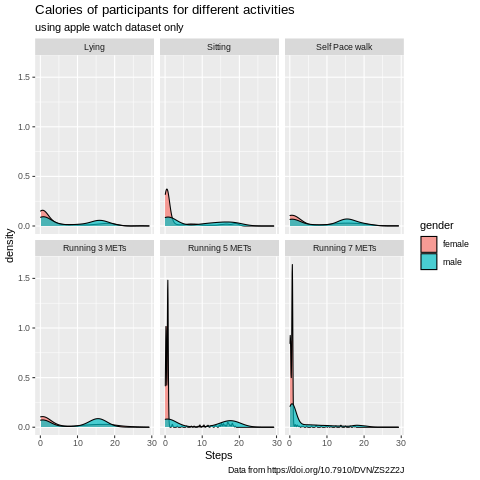

In [ ]:
%%R
ggplot(df, aes(x=Applewatch.Calories_LE, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Calories of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Calories_LE'
        )

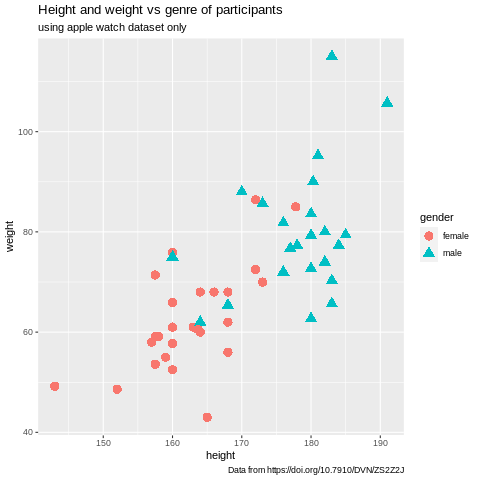

In [ ]:
%%R

ggplot(df, aes(x=height, y=weight, color=gender, shape=gender)) + 
    geom_point(size=4) + 
    labs(title='Height and weight vs genre of participants', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

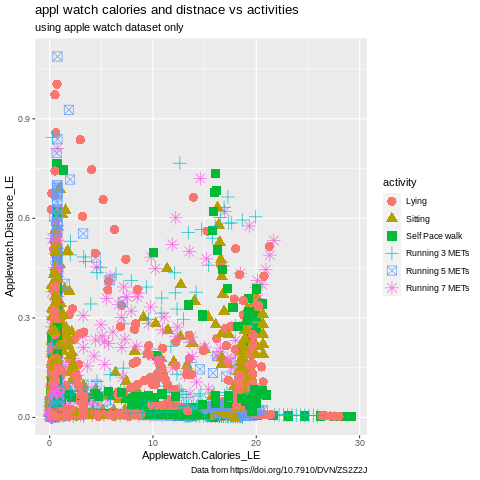

In [ ]:
%%R

ggplot(df, aes(x=Applewatch.Calories_LE, y=Applewatch.Distance_LE, color=activity, shape=activity)) + 
    geom_point(size=4) + 
    labs(title='appl watch calories and distnace vs activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

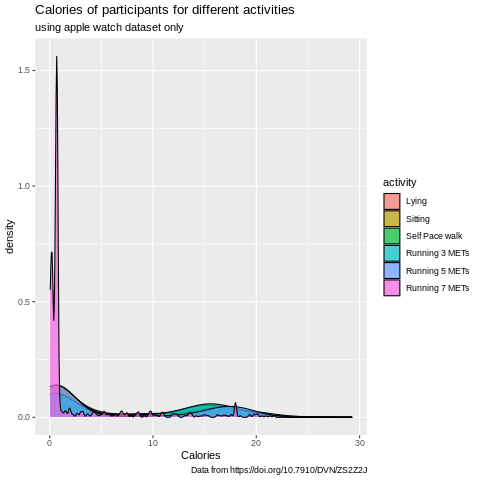

In [ ]:
%%R
ggplot(df, aes(x=Applewatch.Calories_LE, fill=activity)) + 
    geom_density(alpha=0.7) +  
    labs(title='Calories of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Calories'
        )

# PCA

In [ ]:
%%R
head(df[, 2:8])

  age gender height weight Applewatch.Steps_LE Applewatch.Heart_LE
1  20   male    168   65.4            10.77143            78.53130
2  20   male    168   65.4            11.47532            78.45339
3  20   male    168   65.4            12.17922            78.54083
4  20   male    168   65.4            12.88312            78.62826
5  20   male    168   65.4            13.58701            78.71569
6  20   male    168   65.4            14.29091            78.80313
  Applewatch.Calories_LE
1              0.3445329
2              3.2876255
3              9.4840000
4             10.1545556
5             10.8251111
6             11.4956667


In [ ]:
%%R
# df$gender <- as.factor(ifelse(df$gender=='female', 0, 1))
# princomp(na.omit(df[, 2:17]), cor = TRUE)
# pca_data <- as.matrix(raw_pca)
# head(pca_data)

# pca_results <- princomp(pca_data, cor = F)
# summary(pca_results)

NULL
